In [147]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [148]:
input_data_df = pd.read_csv("input_file.csv") 

In [149]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street       11229 non-null  object
 1   state        11220 non-null  object
 2   city         11220 non-null  object
 3   postcode     11220 non-null  object
 4   safety_flag  11229 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 362.0+ KB


In [150]:
print(len(input_data_df) - len(input_data_df.dropna()))

10


Here we can see there are 3 columns with null values i.e state, street, city
We have to decide weather to drop these rows or fill them with manufactured data such as (most occuring object, min-max)
As the number of Null Rows are 10 I think its safe to drop these
So we will drop these 10 rows

In [151]:
final_df = input_data_df.dropna()
final_df['post_code_extension'] = 'Not Available'

## DATA CLEANING

Checking for blank spaces in front and end for all columns to maintain consistency

In [152]:
final_df.loc.__setitem__((slice(None), ('street')), final_df['street'].str.strip()) #Street
final_df.loc.__setitem__((slice(None), ('state')), final_df['state'].str.strip()) #State
final_df.loc.__setitem__((slice(None), ('city')), final_df['city'].str.strip()) #City
final_df.loc.__setitem__((slice(None), ('postcode')), final_df['postcode'].str.strip()) #postcode

In [153]:
final_df.head()

,street,state,city,postcode,safety_flag,post_code_extension
0,3160 Otto Dr,FL,Lakeland,33812-5237,False,Not Available
1,940 Tulip Dr,IN,Indianapolis,46227,False,Not Available
2,68 Rocky Top Rd,VA,Troutville,24175-6054,False,Not Available
3,3330 Taylor Blair Rd,OH,West Jefferson,43162,False,Not Available
4,4254 Eagle Landing Parkway,FL,Orange Park,32065,False,Not Available


Here we see one extra number seperated by '-' in postcode we can seperate that to maintain consitency between the column

In [154]:
def seperate_postcode(postcode):
    """
    This functions takes in a post code in form "XXXX" or "XXXX-YYYY" and gives out just XXXX
    """
    split_list = str(postcode).split(sep='-')
    index = final_df[final_df['postcode'] == postcode].index
    if(len(split_list)>1):
        final_df.loc[index, 'post_code_extension'] = str(split_list[1])
    return str(split_list[0])

In [155]:
# apply function sperate_postcode to complete column
mask = final_df['postcode'].apply(seperate_postcode)
final_df.loc.__setitem__((slice(None), ('postcode')), mask)

In [156]:
final_df

,street,state,city,postcode,safety_flag,post_code_extension
0,3160 Otto Dr,FL,Lakeland,33812,False,5237
1,940 Tulip Dr,IN,Indianapolis,46227,False,Not Available
2,68 Rocky Top Rd,VA,Troutville,24175,False,6054
3,3330 Taylor Blair Rd,OH,West Jefferson,43162,False,Not Available
4,4254 Eagle Landing Parkway,FL,Orange Park,32065,False,Not Available
...,...,...,...,...,...,...
11224,3830 Valley Centre Dr Ste 705 PMB 141,CA,San Diego,92130,False,Not Available
11225,41964 Main St. Suite A,CA,Temecula,92590,True,Not Available
11226,13217 Jamboree Rd STE 111,CA,Tustin,92782,False,Not Available
11227,19662 Wells Dr,CA,Tarzana,91356,False,Not Available


In [157]:
final_df.describe()

,street,state,city,postcode,safety_flag,post_code_extension
count,11219,11219,11219,11219,11219,11219
unique,11188,50,4178,6719,2,3495
top,190 E 98th St,CA,New York,94107,False,Not Available
freq,4,2149,245,26,10113,6239


In [158]:
values = final_df['street'].value_counts().keys().tolist()
counts = final_df['street'].value_counts().tolist()

In [159]:
street_to_fix = []
for it in range(len(counts)):
    if(counts[it] > 1):
        street_to_fix.append(values[it])

In [160]:
len(street_to_fix)

29

Here we see 29 Streets name are repeted more than once we need to make each entry atomic for better patterns

In [161]:
def count_frequency(street_df):
    """
    This function counts the number of True and False and assign the max value to the final row.
    In case of equal count True is assigned by default. So safety_flag threshold set to >=50%
    """
    true_count = len(street_df[street_df['safety_flag'] == True])
    false_count = len(street_df[street_df['safety_flag'] == False])
    if(true_count < false_count):
        return False
    else:
        return True

In [162]:
def fix_streets(street_name):
    street_df = final_df[final_df['street'] == street_name]
    val = count_frequency(street_df)
    index_names = final_df[ final_df['street'] == street_name].index
    one_index = index_names[0]
    index_names = index_names[1:]
    # assign the final saftey_flag to the one remaining row
    final_df.loc[index_names, 'safety_flag'] = val
    # drop all the duplicate street except one
    final_df.drop(index_names, inplace = True) 

In [163]:
for street in street_to_fix:
    fix_streets(street)

In [164]:
final_df

,street,state,city,postcode,safety_flag,post_code_extension
0,3160 Otto Dr,FL,Lakeland,33812,False,5237
1,940 Tulip Dr,IN,Indianapolis,46227,False,Not Available
2,68 Rocky Top Rd,VA,Troutville,24175,False,6054
3,3330 Taylor Blair Rd,OH,West Jefferson,43162,False,Not Available
4,4254 Eagle Landing Parkway,FL,Orange Park,32065,False,Not Available
...,...,...,...,...,...,...
11224,3830 Valley Centre Dr Ste 705 PMB 141,CA,San Diego,92130,False,Not Available
11225,41964 Main St. Suite A,CA,Temecula,92590,True,Not Available
11226,13217 Jamboree Rd STE 111,CA,Tustin,92782,False,Not Available
11227,19662 Wells Dr,CA,Tarzana,91356,False,Not Available


As we see here the data size is decreased from 11219 to 11188

The Data is formated properly now its time to check some visualization to get a clear insight from this data

The Dataset contains mainly 5 columns which shows the safety_flag for a given location. Location is divided into 4 columns state->city->pincode->street which forms the complete address.

Data cleaning tasks done on the initial data :

* strip all the values so that no leading or trailing space follows
* converted pincode into a 5 digit fix format by removing the extra part given
* some streets were repeated with different safety_flag values so fixed that to have the maximum occuring value of safety_flag in atomic row

## Data Viz

In [165]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

Lets see the state with the max safty_flag set to True

In [166]:
def count_true_per_state(state):
    state_rows = final_df[final_df['state'] == state]
    return state_rows[state_rows['safety_flag'] == True]['safety_flag'].count()

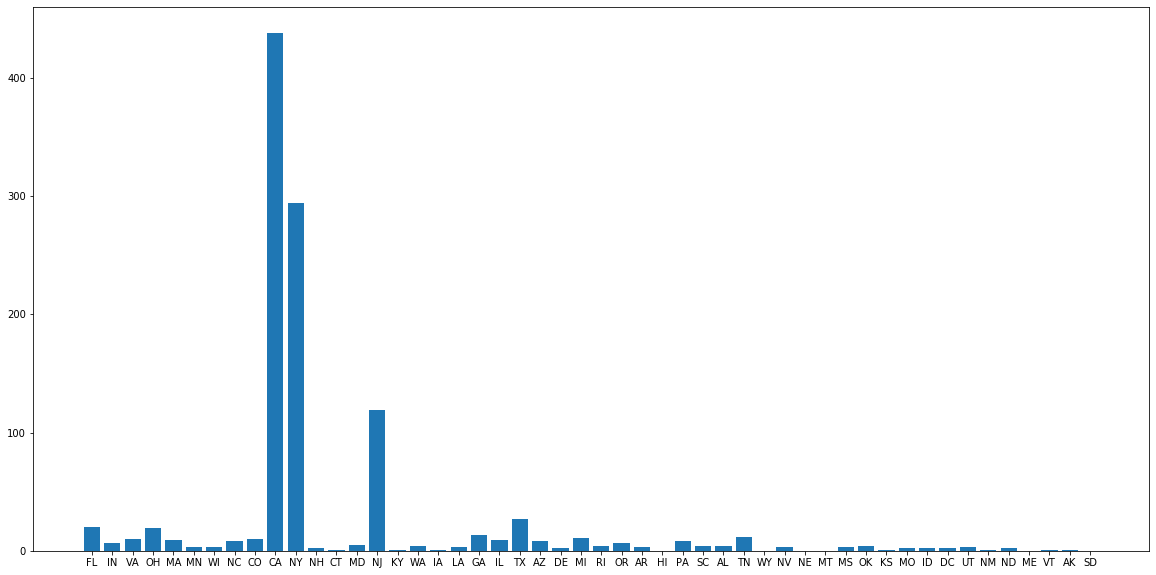

In [167]:
# States
states = final_df['state'].unique()
x = states
# True Count
y = []
for state in states:
    y.append(count_true_per_state(state))
# Function to plot  
plt.bar(x, y)  
# Function to show the plot  
plt.show()

Here we can see CA and NY has maximum number of safty_flag as True

In [168]:
total_states = final_df[final_df['safety_flag'] == True]['safety_flag'].count()

In [169]:
total_states

1094

In [170]:
final_df.rename(columns={'postcode': 'post_code'}, inplace=True)

In [171]:
final_df = final_df.reset_index(drop=True)
final_df['country'] = 'US'

In [172]:
final_df.to_csv("final_input_file.csv", index=False)

Also out of 11188 rows only 1094 rows have value of safety_flag as True

## VERDICT

The Data supplied here is insufficient to make any marketing suggestions however we can find out the most safe streets with the given data.

We need to pull more data into this to make valid predictions
